# Load Dataset

In [1]:
import pandas as pd
df = pd.read_excel("usefile.xlsx")
df

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index,Stroke
0,0,3.0,0,0,0,0,0,95.12,18.0,0,0
1,0,58.0,1,0,1,2,1,87.96,39.2,0,0
2,1,8.0,0,0,0,2,1,110.89,17.6,0,0
3,1,70.0,0,0,1,2,0,69.04,35.9,1,0
4,1,47.0,0,0,1,2,1,210.95,50.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,0,1,58.64,20.4,0,0
43396,1,56.0,0,0,1,4,1,213.61,55.4,1,0
43397,1,82.0,1,0,1,2,1,91.94,28.9,1,0
43398,0,40.0,0,0,1,2,1,99.16,33.2,0,0


<AxesSubplot:>

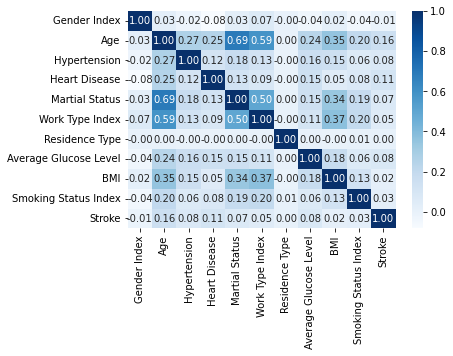

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (30,10)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Blues')

# Spliting the dataset into train and test dataset

In [3]:
from sklearn.model_selection import train_test_split
x = df.drop('Stroke',axis=1)
y = df['Stroke']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print ("X_Train:-", x_train.shape, "X_Test:-", x_val.shape)
print ("y_Train:-", y_train.shape, "y_Test:-", y_val.shape)
print("Total number of features in x dataset:", len(x.head()))
print("featuers in x dataset", x.head())
print("Total number of features in y dataset:", len(y.head()))
print("featuers in x dataset", y.head())

X_Train:- (34720, 10) X_Test:- (8680, 10)
y_Train:- (34720,) y_Test:- (8680,)
Total number of features in x dataset: 5
featuers in x dataset    Gender Index   Age  Hypertension  Heart Disease  Martial Status  \
0             0   3.0             0              0               0   
1             0  58.0             1              0               1   
2             1   8.0             0              0               0   
3             1  70.0             0              0               1   
4             1  47.0             0              0               1   

   Work Type Index  Residence Type  Average Glucose Level   BMI  \
0                0               0                  95.12  18.0   
1                2               1                  87.96  39.2   
2                2               1                 110.89  17.6   
3                2               0                  69.04  35.9   
4                2               1                 210.95  50.1   

   Smoking Status Index  
0        

# Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
print ("X_Train:-", x_train, "X_Test:-", x_val)
print ("y_Train:-", y_train, "y_Test:-", y_val)

X_Train:- [[ 8.31871452e-01  1.36823517e+00 -3.17967987e-01 ...  9.19424865e-01
   1.41922995e-03 -6.40771469e-01]
 [ 8.31871452e-01 -7.15788216e-01 -3.17967987e-01 ... -1.38141638e-02
  -6.89848684e-01  7.03655979e-01]
 [ 8.31871452e-01 -1.02617468e+00 -3.17967987e-01 ... -4.83334819e-01
  -7.55062638e-01 -6.40771469e-01]
 ...
 [-1.19925209e+00  4.37075784e-01 -3.17967987e-01 ...  1.23815964e-01
   7.18772726e-01 -6.40771469e-01]
 [-1.19925209e+00  1.23521240e+00 -3.17967987e-01 ...  2.76919235e+00
   7.44858308e-01  7.03655979e-01]
 [-1.19925209e+00  7.91803168e-01 -3.17967987e-01 ...  2.46793787e+00
  -4.02907286e-01  7.03655979e-01]] X_Test:- [[ 0.83187145  0.52575763 -0.31796799 ... -1.09118188  0.15793272
  -0.64077147]
 [ 0.83187145 -1.02617468 -0.31796799 ... -0.70614245  0.78398668
  -0.64077147]
 [ 0.83187145 -0.67144729 -0.31796799 ... -0.11964779  0.21010388
  -0.64077147]
 ...
 [-1.19925209 -0.89315191 -0.31796799 ... -0.79897896 -1.2376459
  -0.64077147]
 [-1.19925209 -0.

# Initializing ANN

Define the model architecture

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout

model = keras.Sequential([
    # Input layer with 10 features
    keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    keras.layers.Dropout(0.2),
    # Hidden layer 1 with 32 units
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    # Hidden Layer 2 with 16 units
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    # Output layer with 1 unit
    keras.layers.Dense(1, activation='sigmoid')
])

Add weights and biases to the hidden layer

In [6]:
model.layers[0].set_weights([
    # Weight matrix with shape (input_dim, output_dim)
    tf.random.normal((10, 64)),
    # Bias vector with shape (output_dim,)
    tf.zeros(64)
])

In [7]:
model.layers[2].set_weights([
    # Weight matrix with shape (input_dim, output_dim)
    tf.random.normal((64, 32)),
    # Bias vector with shape (output_dim,)
    tf.zeros(32)
])

In [8]:
model.layers[4].set_weights([
    # Weight matrix with shape (input_dim, output_dim)
    tf.random.normal((32, 16)),
    # Bias vector with shape (output_dim,)
    tf.zeros(16)
])

Compile the model

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the model

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    # the metric to monitor
    monitor='val_loss', 
    # number of epochs with no improvement after which training will be stopped
    patience=5, 
    # whether to print updates to the console
    verbose=1, 
    # whether the monitored metric should be minimized or maximized
    mode='min', 
     # whether to restore the weights of the best iteration
    restore_best_weights=True
)

In [26]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
1085/1085 [==============================] - 4s 4ms/step - loss: 0.0781 - accuracy: 0.9821 - val_loss: 0.0807 - val_accuracy: 0.9815
Epoch 2/100
1085/1085 [==============================] - 4s 3ms/step - loss: 0.0776 - accuracy: 0.9821 - val_loss: 0.0805 - val_accuracy: 0.9815
Epoch 3/100
1085/1085 [==============================] - 4s 3ms/step - loss: 0.0776 - accuracy: 0.9821 - val_loss: 0.0803 - val_accuracy: 0.9815
Epoch 4/100
1085/1085 [==============================] - 4s 3ms/step - loss: 0.0771 - accuracy: 0.9821 - val_loss: 0.0810 - val_accuracy: 0.9815
Epoch 5/100
1085/1085 [==============================] - 4s 4ms/step - loss: 0.0775 - accuracy: 0.9821 - val_loss: 0.0825 - val_accuracy: 0.9815
Epoch 6/100
1085/1085 [==============================] - 4s 3ms/step - loss: 0.0786 - accuracy: 0.9820 - val_loss: 0.0804 - val_accuracy: 0.9815
Epoch 7/100
1085/1085 [==============================] - 4s 3ms/step - loss: 0.0774 - accuracy: 0.9820 - val_loss: 0.0808 - val_ac

# Save the model

In [29]:
model.save('ANN_model.h5')

# confusion matrix

272/272 [==============================] - 1s 2ms/step


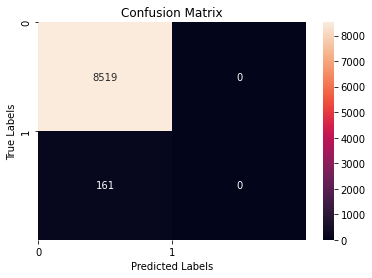

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_prob = model.predict(x_val)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d')

# Add labels, title, and ticks to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(np.unique(y))), np.unique(y))
plt.yticks(np.arange(len(np.unique(y))), np.unique(y))
plt.show()

# Plot ROC curve

272/272 [==============================] - 1s 3ms/step


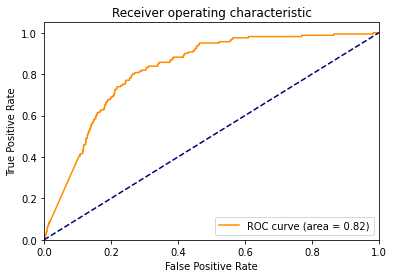

In [31]:
from sklearn.metrics import roc_curve, auc

y_scores = model.predict(x_val)
fpr, tpr, thresholds = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Learning Rate

Epoch 1/100
1085/1085 [==============================] - 4s 4ms/step - loss: 0.0778 - accuracy: 0.9820 - val_loss: 0.0804 - val_accuracy: 0.9815
Epoch 2/100
1085/1085 [==============================] - 4s 3ms/step - loss: 0.0774 - accuracy: 0.9821 - val_loss: 0.0809 - val_accuracy: 0.9815
Epoch 3/100
1085/1085 [==============================] - 4s 3ms/step - loss: 0.0774 - accuracy: 0.9821 - val_loss: 0.0816 - val_accuracy: 0.9815
Epoch 4/100
1085/1085 [==============================] - 4s 3ms/step - loss: 0.0768 - accuracy: 0.9821 - val_loss: 0.0811 - val_accuracy: 0.9815
Epoch 5/100
1085/1085 [==============================] - 4s 3ms/step - loss: 0.0766 - accuracy: 0.9821 - val_loss: 0.0820 - val_accuracy: 0.9815
Epoch 6/100
1085/1085 [==============================] - 4s 3ms/step - loss: 0.0767 - accuracy: 0.9821 - val_loss: 0.0816 - val_accuracy: 0.9815
Epoch 6: early stopping


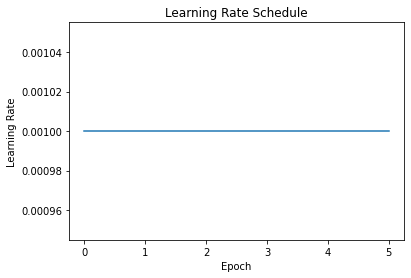

In [36]:
import matplotlib.pyplot as plt

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[early_stopping]
)

# Get learning rate over epochs
lr = []
for epoch in history.epoch:
    optimizer = model.optimizer
    lr.append(optimizer.learning_rate.numpy())

# Plot learning rate over epochs
plt.plot(history.epoch, lr)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()


# Training and validation accuracy

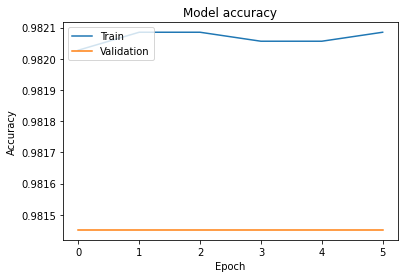

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Training and Validation Loss

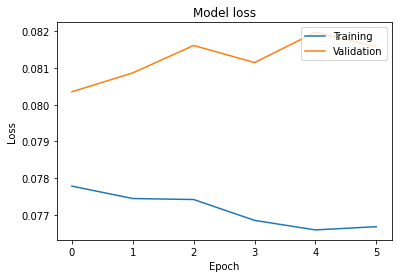

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()